Using some of the code from the fastai vision tutorial and from https://colab.research.google.com/github/muellerzr/Practical-Deep-Learning-for-Coders-2.0/blob/master/Computer%20Vision/02_MNIST.ipynb

In [ ]:
!pip install fastai2

In [1]:
from fastai2.vision.all import *

Download the MNIST data set and mung a bit

In [42]:
path=untar_data(URLs.MNIST)
items=get_image_files(path)

Use the training and testing directories as the training and validation sets

In [43]:
splits = GrandparentSplitter(train_name='training', valid_name='testing')
splits=splits(items)

Set up the data to be used in the fastai v2 API

In [49]:
dsrc = Datasets(items, tfms=[[PILImage.create], [parent_label, Categorize]], 
splits=splits)

# 3.1
Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
on the test set. Hint: the KNeighborsClassifier works quite well for this task;
you just need to find good hyperparameter values (try a grid search on the
weights and n_neighbors hyperparameters).

Transform the images to 

1.   run on resnet34
2.   normalize



In [50]:
tfms = [ToTensor(), Resize(224)]
gpu_tfms = [IntToFloatTensor(), Normalize()]

put the data into a structure for training with batch size = 128
Show example images to verify this is all working

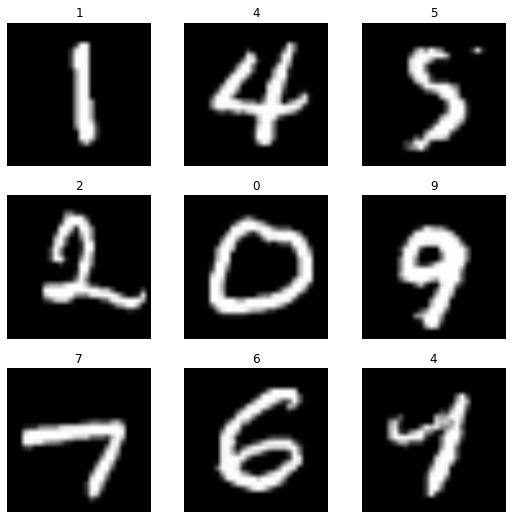

In [51]:
dls = dsrc.dataloaders(bs=128, after_item=tfms, after_batch=gpu_tfms)
dls.show_batch()

Creat a CNN using the pretrained resnet34

In [53]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

Figure out the best learning rate to start with

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.004365158267319202)

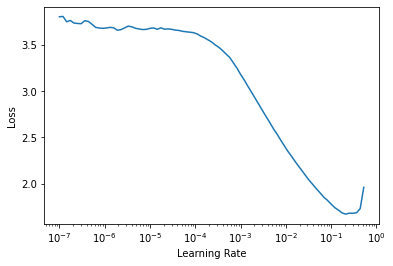

In [54]:
learn.lr_find()

Fine tune the last few layers for this particular dataset

epoch,train_loss,valid_loss,accuracy,time
0,0.123187,0.062618,0.983500,02:22


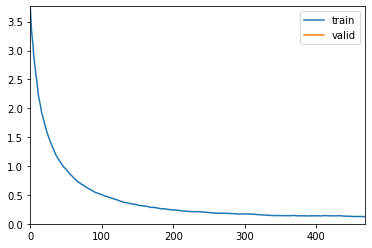

epoch,train_loss,valid_loss,accuracy,time
0,0.074860,0.040982,0.989300,02:51
1,0.058006,0.024204,0.993300,02:50
2,0.025194,0.019799,0.994300,02:49
3,0.013374,0.013196,0.996300,02:50
4,0.004235,0.011914,0.996500,02:49


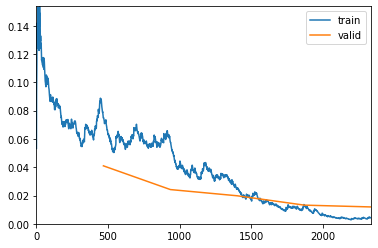

In [55]:
learn.fine_tune(5,1e-2,cbs=ShowGraphCallback())

So that definitely answers the mail on MNIST accuracy >97% :)

# 3.2
Write a function that can shift an MNIST image in any direction (left, right, up,
or down) by one pixel.5 Then, for each image in the training set, create four shifted
copies (one per direction) and add them to the training set. Finally, train your
best model on this expanded training set and measure its accuracy on the test set.
You should observe that your model performs even better now! This technique of
artificially growing the training set is called data augmentation or training set
expansion.

I'm not going to that specific augmentation, I'm just going to use the built-in data augmentations in the fastai2 library. aug_transforms() gives a list of useful image augmentations

Using the same code as above, just now with the augmentations

In [72]:
tfms = [ToTensor(), Resize(224)]
gpu_tfms = [IntToFloatTensor(), Normalize(),*aug_transforms()]

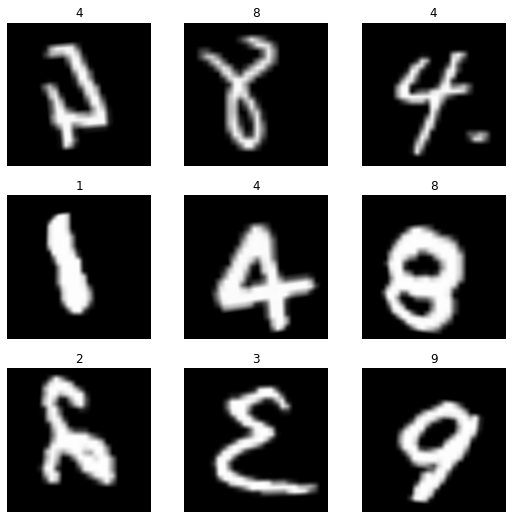

In [73]:
dls = dsrc.dataloaders(bs=128, after_item=tfms, after_batch=gpu_tfms)
dls.show_batch()

In [74]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.001737800776027143)

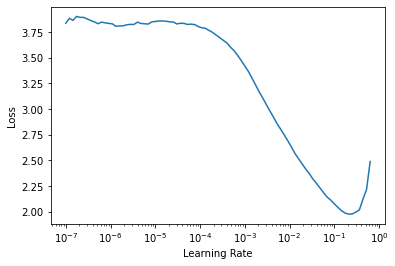

In [75]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.205610,0.112884,0.963700,02:23


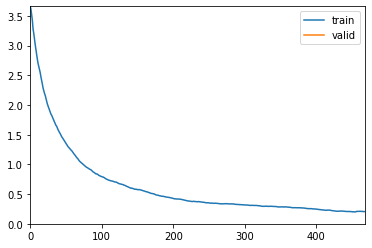

epoch,train_loss,valid_loss,accuracy,time
0,0.116791,0.242882,0.934700,02:58
1,0.091166,0.087561,0.976200,02:57
2,0.052573,0.040520,0.987700,02:56
3,0.035174,0.024399,0.991700,02:56
4,0.023765,0.021142,0.992800,02:56


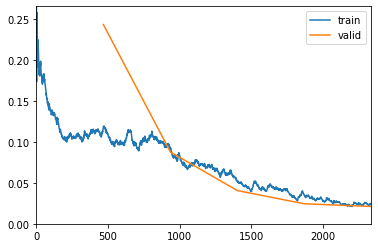

In [76]:
learn.fine_tune(5,1e-2,cbs=ShowGraphCallback())

Interestingly, in this case it didn't improve the accuracy at all. Assuredly this is just because there isn't much room to improve the accuracy no matter what you do